### Fitting data with formula
Gnuplot is capable to fit given data with functions given as formulas. This notebook contain several examples about how to fit data with GnuplotRB.

First lets prepare some data:

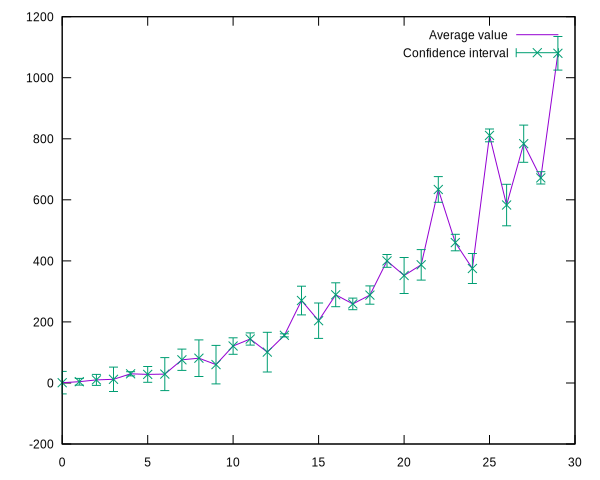

In [1]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB
include Fit

rows = (1..30).map do |i|
  [i**2 * (rand(4) + 3) / 5, rand(70) + 1]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

random_points = Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err']
)

And now lets try to fit it with some function.

First parameter of #fit is *data* (you can use here Datablock, Dataset or any other object out of which Datablock may be constructed). Special options are *function* and *initials*, other options (such as *using*) may be found in gnuplot docs. Be careful: you should give initial value for each coefficient used in formula.

Return value is the following hash:
```
{
  :formula_ds => #<dataset with formula which fits given data>,
  :coefficients => #<hash of calculated coefficients>,
  :deltas => #<hash of possible deltas for coefficients>,
  :data => #<given data>
}
```

In [2]:
some_poly = fit(df, function: "a*x**3 + b*x + c", initials: {a: 1, b: 1, c: 1})
some_poly[:coefficients]

{:a=>0.0271674, :b=>8.64614, :c=>-6.69375}

In [3]:
some_poly[:formula_ds].data

" 0.0271674*x**3 + 8.64614*x + -6.69375 "

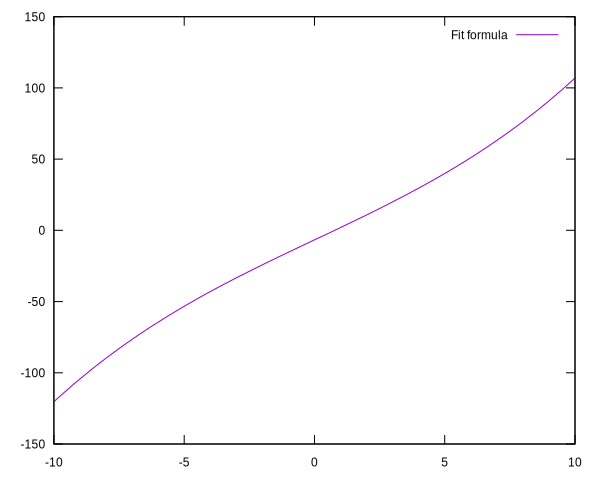

In [4]:
some_poly[:formula_ds]

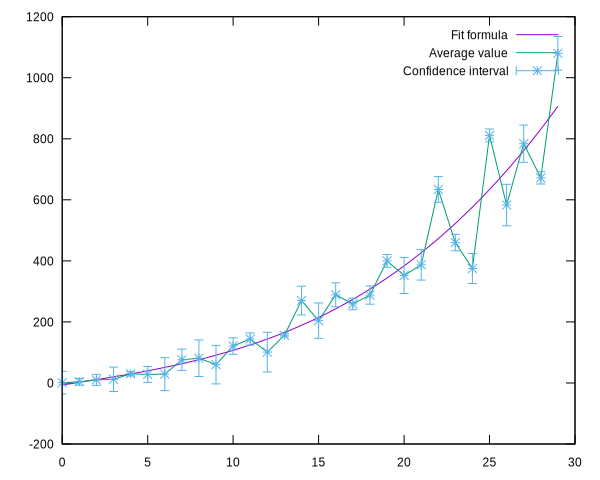

In [5]:
random_points << some_poly[:formula_ds]

You can find more information about how gnuplot's fitting work in [gnuplot doc](http://www.gnuplot.info/docs_5.0/gnuplot.pdf).

#### Default fittings
Polynomial:

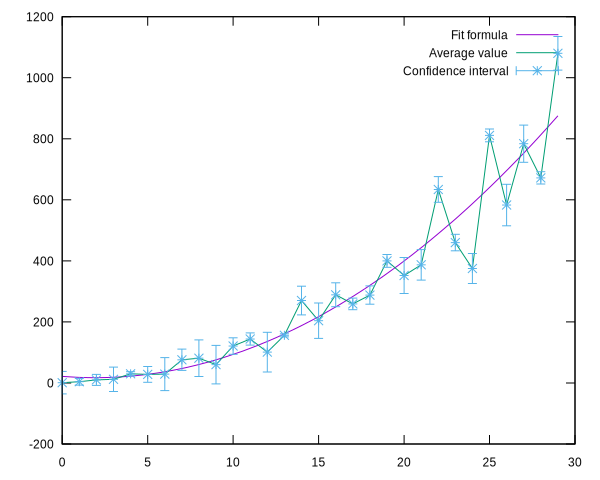

In [6]:
poly = fit_poly(df)
random_points.add_dataset(poly[:formula_ds])

Be default polynomial degree is 2 but you can set it:

In [7]:
frames = (2..9).map { |i| random_points.add_dataset(fit_poly(df, degree: i)[:formula_ds].options(title: "Fit (degree #{i})", lw: 2)) }
Animation.new(*frames, animate: { delay: 150 } )

#<GnuplotRB::Animation:0x00000002a353c0 @plots=Hamster::Vector[#<GnuplotRB::Plot:0x00000000bded90 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000000bdfba0 @type=:math_function, @data=" 21.6097*x**0 + -4.51502*x**1 + 1.17086*x**2 ", @options=Hamster::Hash[:title => "Fit (degree 2)", :lw => 2]>, #<GnuplotRB::Dataset:0x00000002a24908 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002a24778 @stored_in_file=false, @data="0 1\n1 4\n2 10\n3 12\n4 30\n5 28\n6 29\n7 76\n8 81\n9 60\n10 121\n11 144\n12 101\n13 156\n14 270\n15 204\n16 289\n17 259\n18 288\n19 400\n20 352\n21 387\n22 634\n23 460\n24 375\n25 811\n26 583\n27 784\n28 672\n29 1080\n">, @options=Hamster::Hash[:with => "lines", :title => "Average value", :using => "1:2"]>, #<GnuplotRB::Dataset:0x00000002a35ca8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002a35af0 @stored_in_file=false, @data="0 1 37\n1 4 11\n2 10 18\n3 12 40\n4 30 7\n5 28 26\n6 29 54\n7 76 35\n8 81 60\n9 60 63\n10 121 27\n11 144 20\n12 101 65\n13 156 5\n14 270 47\n15 204 58\n16 289 39\n17 259 19\n18 288 30\n19 400 21\n20 352 59\n21 387 50\n22 634 42\n23 460 27\n24 375 49\n25 811 21\n26 583 68\n27 784 61\n28 672 20\n29 1080 55\n">, @options=Hamster::Hash[:with => "err", :title => :"Confidence interval", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002ca0510 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002ca0768 @type=:math_function, @data=" -17.2576*x**0 + 13.0749*x**1 + -0.371488*x**2 + 0.0354564*x**3 ", @options=Hamster::Hash[:title => "Fit (degree 3)", :lw => 2]>, #<GnuplotRB::Dataset:0x00000002a24908 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002a24778 @stored_in_file=false, @data="0 1\n1 4\n2 10\n3 12\n4 30\n5 28\n6 29\n7 76\n8 81\n9 60\n10 121\n11 144\n12 101\n13 156\n14 270\n15 204\n16 289\n17 259\n18 288\n19 400\n20 352\n21 387\n22 634\n23 460\n24 375\n25 811\n26 583\n27 784\n28 672\n29 1080\n">, @options=Hamster::Hash[:with => "lines", :title => "Average value", :using => "1:2"]>, #<GnuplotRB::Dataset:0x00000002a35ca8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002a35af0 @stored_in_file=false, @data="0 1 37\n1 4 11\n2 10 18\n3 12 40\n4 30 7\n5 28 26\n6 29 54\n7 76 35\n8 81 60\n9 60 63\n10 121 27\n11 144 20\n12 101 65\n13 156 5\n14 270 47\n15 204 58\n16 289 39\n17 259 19\n18 288 30\n19 400 21\n20 352 59\n21 387 50\n22 634 42\n23 460 27\n24 375 49\n25 811 21\n26 583 68\n27 784 61\n28 672 20\n29 1080 55\n">, @options=Hamster::Hash[:with => "err", :title => :"Confidence interval", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002f1be70 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000002f0c100 @type=:math_function, @data=" 18.6074*x**0 + -16.1192*x**1 + 4.33921*x**2 + -0.219992*x**3 + 0.00440428*x**4 ", @options=Hamster::Hash[:title => "Fit (degree 4)", :lw => 2]>, #<GnuplotRB::Dataset:0x00000002a24908 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002a24778 @stored_in_file=false, @data="0 1\n1 4\n2 10\n3 12\n4 30\n5 28\n6 29\n7 76\n8 81\n9 60\n10 121\n11 144\n12 101\n13 156\n14 270\n15 204\n16 289\n17 259\n18 288\n19 400\n20 352\n21 387\n22 634\n23 460\n24 375\n25 811\n26 583\n27 784\n28 672\n29 1080\n">, @options=Hamster::Hash[:with => "lines", :title => "Average value", :using => "1:2"]>, #<GnuplotRB::Dataset:0x00000002a35ca8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000002a35af0 @stored_in_file=false, @data="0 1 37\n1 4 11\n2 10 18\n3 12 40\n4 30 7\n5 28 26\n6 29 54\n7 76 35\n8 81 60\n9 60 63\n10 121 27\n11 144 20\n12 101 65\n13 156 5\n14 270 47\n15 204 58\n16 289 39\n17 259 19\n18 288 30\n19 400 21\n20 352 59\n21 387 50\n22 634 42\n23 460 27\n24 375 49\n25 811 21\n26 583 68\n27 784 61\n28 672 20\n29 1080 55\n">, @options=Hamster::Hash[:with => "err", :title => :"Confidence interval", :using => "1:2:3"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000002a63a40 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dat

You can also fit data with *exp*, *sin* and *log* like this:

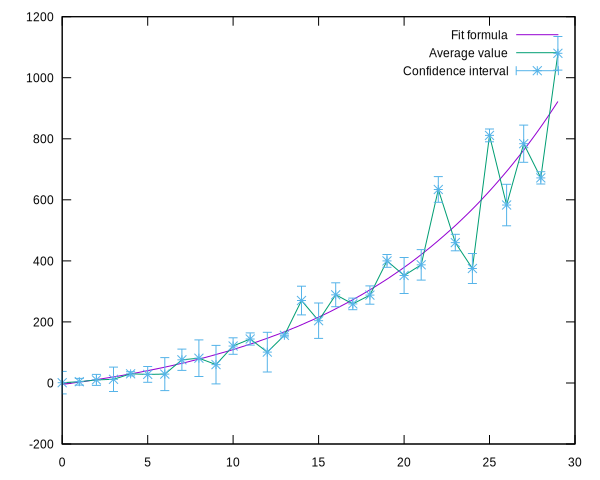

In [8]:
exp = fit_exp(df)
random_points.add_dataset(exp[:formula_ds])

And set ranges for fitting:

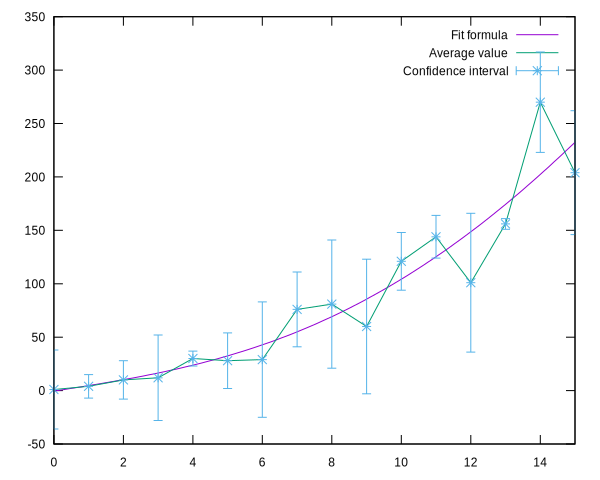

In [9]:
ranged_poly = fit_poly(df, degree: 4, term_options: { xrange: 0..15})
random_points.add_dataset(ranged_poly[:formula_ds]).xrange(0..15)